## Loading the data

In [2]:
import os
import glob
import librosa
import pandas as pd

# configuring the folder used
AUDIO_DIR = "AudioWAV"

# mapping emotions to integers
EMOTION_MAP = {
    "ANG": 0,
    "DIS": 1,
    "FEA": 2,
    "HAP": 3,
    "NEU": 4,
    "SAD": 5
}

rows = []

# loading audio files
wav_files = glob.glob(os.path.join(AUDIO_DIR, "*.wav"))
print(f"Found {len(wav_files)} WAV files")

for wav_path in wav_files:
    file_name = os.path.basename(wav_path)

    # splitting the parts of the file name
    name_parts = file_name.replace(".wav", "").split("_")

    if len(name_parts) != 4:
        print(f"Skipping malformed filename: {file_name}")
        continue

    actor_id, sentence_id, emotion, emotion_level = name_parts

    # loading audio metadata
    y, sr = librosa.load(wav_path, sr=None)
    duration_sec = len(y) / sr

 # assigning info to the rows
    rows.append({
        "file_name": file_name,
        "file_path": wav_path,
        "actor_id": int(actor_id),
        "sentence_id": sentence_id,
        "emotion": emotion,
        "emotion_id": EMOTION_MAP.get(emotion, -1),
        "emotion_level": emotion_level,
        "duration_sec": round(duration_sec, 3),
        "sample_rate": sr,
        "num_samples": len(y)
    })

# building the dataframe
df = pd.DataFrame(rows)

# sorting
df = df.sort_values(
    by=["emotion", "actor_id", "sentence_id"],
    ignore_index=True
)

# displaying the table
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_6588\2117785377.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Found 7442 WAV files


,file_name,file_path,actor_id,sentence_id,emotion,emotion_id,emotion_level,duration_sec,sample_rate,num_samples
0,1001_DFA_ANG_XX.wav,AudioWAV\1001_DFA_ANG_XX.wav,1001,DFA,ANG,0,XX,2.276,16000,36409
1,1001_IEO_ANG_HI.wav,AudioWAV\1001_IEO_ANG_HI.wav,1001,IEO,ANG,0,HI,1.935,16000,30964
2,1001_IEO_ANG_LO.wav,AudioWAV\1001_IEO_ANG_LO.wav,1001,IEO,ANG,0,LO,2.069,16000,33100
3,1001_IEO_ANG_MD.wav,AudioWAV\1001_IEO_ANG_MD.wav,1001,IEO,ANG,0,MD,2.636,16000,42175
4,1001_IOM_ANG_XX.wav,AudioWAV\1001_IOM_ANG_XX.wav,1001,IOM,ANG,0,XX,2.135,16000,34167


## Exporting the dataframe to a CSV file for easier access

In [3]:
df.to_csv("crema_d_dataset.csv", index=False)


# EDA (Exploratory Data Analysis)

## Unique counts in the dataset

In [5]:
n_clips = len(df)
n_emotions = df["emotion"].nunique()
n_actors = df["actor_id"].nunique()
n_sentences = df["sentence_id"].nunique()


print(f"Total clips: {n_clips}")
print(f"Emotion classes: {n_emotions}")
print(f"Actors: {n_actors}")
print(f"Sentences: {n_sentences}")


Total clips: 7442
Emotion classes: 6
Actors: 91
Sentences: 12


The dataset contains **7442** audio clips from **91** different actors reading **12** different sentences and expressing **6** different emotions.

## Emotion label distribution

In [6]:
emotion_counts = df["emotion"].value_counts().sort_index()
emotion_counts


emotion
ANG    1271
DIS    1271
FEA    1271
HAP    1271
NEU    1087
SAD    1271
Name: count, dtype: int64

There is equal count of all of the emotion labels (1271) with the exception for neutral (1087).

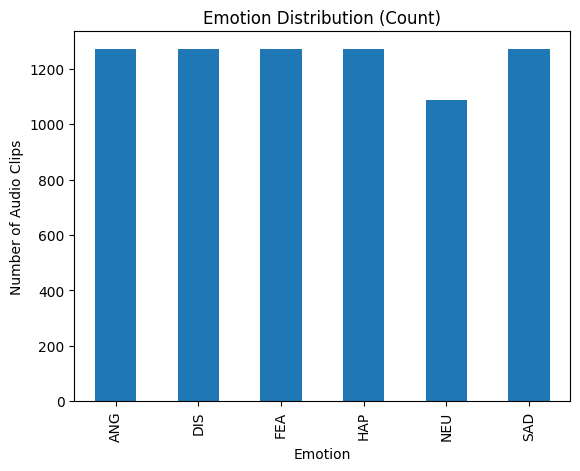

In [9]:
import matplotlib.pyplot as plt

emotion_counts.plot(kind="bar")
plt.title("Emotion Distribution (Count)")
plt.xlabel("Emotion")
plt.ylabel("Number of Audio Clips")
plt.show()


The conclusion is that the dataset is balanced, having equal amount of representatives for all emotions (1271), with a bit less for neutral (1087).

## Audio duration analysis

In [10]:
df["duration_sec"].describe()


count    7442.000000
mean        2.542855
std         0.505968
min         1.268000
25%         2.202000
50%         2.502000
75%         2.836000
max         5.005000
Name: duration_sec, dtype: float64

Audio clip durations range from 1.27 to 5.01 seconds, with a mean duration of approximately 2.54 seconds and a median of 2.50 seconds. The majority of clips fall within a narrow range around the mean, indicating consistent recording lengths. This supports the use of a fixed-length input representation for model training. There is no evidence of corrupt or zero-length audios.

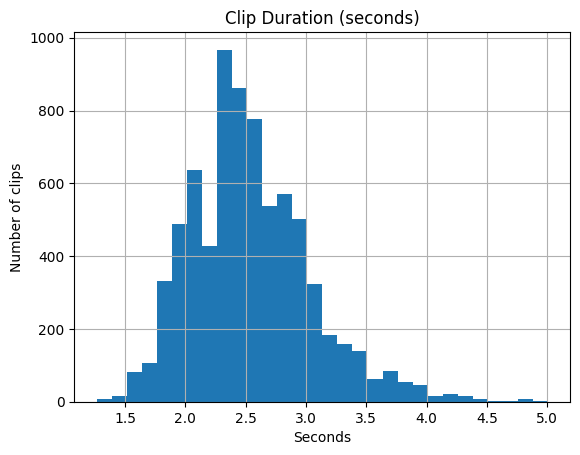

In [11]:
df["duration_sec"].hist(bins=30)
plt.title("Clip Duration (seconds)")
plt.xlabel("Seconds")
plt.ylabel("Number of clips")
plt.show()


The majority of clips are concentrated around 2.5 seconds, with a narrow spread and a small number of longer clips extending to approximately 5 seconds.

## Actor-level distribution

In [18]:
actor_counts = df.groupby("actor_id").size()
actor_counts.describe()


count    91.000000
mean     81.780220
std       1.083228
min      76.000000
25%      82.000000
50%      82.000000
75%      82.000000
max      82.000000
dtype: float64

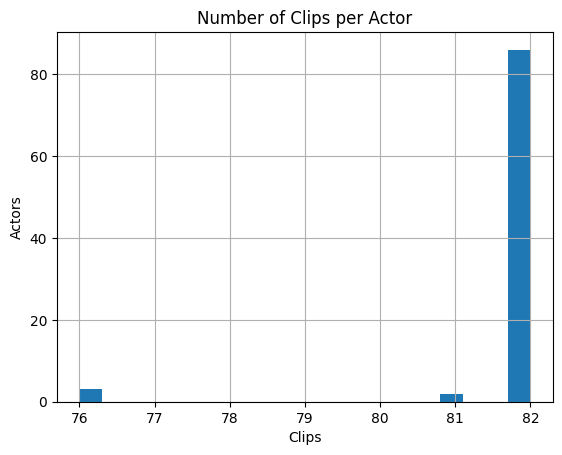

In [19]:
actor_counts.hist(bins=20)
plt.title("Number of Clips per Actor")
plt.xlabel("Clips")
plt.ylabel("Actors")
plt.show()


The dataset contains data from 91 actors with approximately 82 recordings per speaker, with a very little variation between them. This shows that the dataset is well balanced across speakers and that no single actor dominates the data. Such balance is important because it helps the model learn emotional patterns rather than speaker-specific characteristics.

## Sentence distribution

In [13]:
sentence_counts = df["sentence_id"].value_counts().sort_index()
sentence_counts


sentence_id
DFA     546
IEO    1456
IOM     546
ITH     540
ITS     545
IWL     546
IWW     546
MTI     540
TAI     546
TIE     545
TSI     546
WSI     540
Name: count, dtype: int64

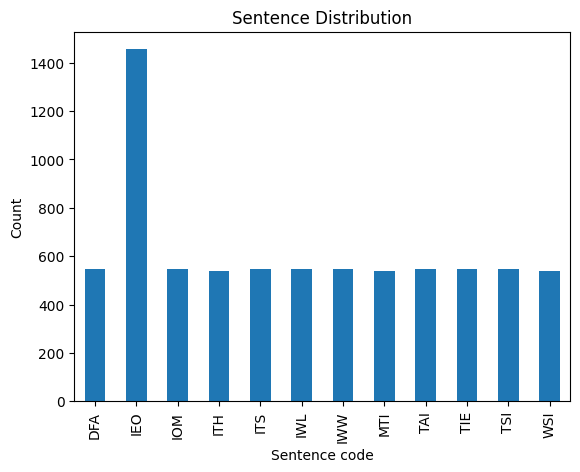

In [14]:
sentence_counts.plot(kind="bar")
plt.title("Sentence Distribution")
plt.xlabel("Sentence code")
plt.ylabel("Count")
plt.show()


The distribution of sentences is mostly uniform across the dataset, with the exception of the sentence “It’s eleven o’clock,” which appears more frequently. This reflects the experimental design of the CREMA-D corpus and does not affect the emotion recognition task.

## Data Quality Checks

In [15]:
df.isna().sum()


file_name        0
file_path        0
actor_id         0
sentence_id      0
emotion          0
emotion_id       0
emotion_level    0
duration_sec     0
sample_rate      0
num_samples      0
dtype: int64

There are no missing values in the dataset.

In [16]:
df[df["emotion_id"] == -1]


,file_name,file_path,actor_id,sentence_id,emotion,emotion_id,emotion_level,duration_sec,sample_rate,num_samples


There are no invalid emotion IDs.

In [17]:
df["file_name"].duplicated().sum()


0

There are no duplicate file names.

## EDA Conclusion

Exploratory data analysis of the CREMA-D audio dataset shows that the data is clean, well-structured and suitable for audio-based emotion recognition. The dataset contains 7,442 speech recordings from 91 actors, with a nearly equal number of clips per speaker, reducing the risk of speaker bias.

The distribution of emotion classes is approximately balanced, ensuring that no single emotion dominates the dataset. Audio recordings have consistent properties, with most clips lasting around 2.5 seconds and using a 16 kHz sampling rate, which supports the use of a fixed-length audio representation. The sentence distribution reflects the experimental design of the dataset and does not introduce issues for the emotion classification task.

Overall, the dataset shows no significant inconsistencies, missing values or extreme outliers. Based on these findings, the CREMA-D audio data is appropriate for building and evaluating an audio-only emotion recognition model.

## Audio Preprocessing and Feature Extraction Setup

In [26]:
import numpy as np
import pandas as pd
import librosa

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Global audio settings
SAMPLE_RATE = 16000
TARGET_DURATION = 3.0
TARGET_SAMPLES = int(SAMPLE_RATE * TARGET_DURATION)
N_MFCC = 13


In this section I define the global audio parameters and import the libraries needed for MFCC feature extraction and classical machine learning models. I will use 16kHz sample rate, 3 seconds target duration and MFCC features (13 coefficients, summarized by mean and standard deviation)

## Loading and Normalizing Audio Length

In [27]:
def load_and_fix_length(path,
                        sample_rate=SAMPLE_RATE,
                        target_samples=TARGET_SAMPLES):

    # loading with original sample rate
    y, sr = librosa.load(path, sr=None)

    # resampling only if not already at desired sample rate
    if sr != sample_rate:
        y = librosa.resample(y, orig_sr=sr, target_sr=sample_rate)
        sr = sample_rate

    # 3) padding or trimming to target length
    if len(y) < target_samples:
        pad_width = target_samples - len(y)
        y = np.pad(y, (0, pad_width), mode="constant")
    else:
        y = y[:target_samples]

    return y


Here I define a helper function that load a WAV file, resamples it to 16kHz, pads or trims to a fixed duration of 3 seconds.

This ensures that all audio clips have the same length in samples (48 000 samples at 16kHz) which is required for a consistent feature extraction.

## MFCC Feature Extraction for One Audio Clip

In [28]:
def extract_mfcc_features(y,
                          sample_rate=SAMPLE_RATE,
                          n_mfcc=N_MFCC):

    mfcc = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=n_mfcc)

    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std  = np.std(mfcc, axis=1)

    features = np.concatenate([mfcc_mean, mfcc_std], axis=0)
    return features

# Sanity check shape
feat_test = extract_mfcc_features(y_test)
feat_test.shape


(26,)

For each fixed-length audio signal, I extract MFCC features. I compute 13 MFCC coefficients over time and the mean and standard deviation of each coefficient.

This gives a fixed-length feature vector of size 26 (13 means + 13 standard deviations)
for each audio clip.

## Building Feature Matrix X and Label Vector y

I now loop over all rows in the df and normalize each audio file, extract MFCC features and collect `X`: feature matrix (n_samples × n_features), `y`: emotion labels (n_samples,), `actors`: actor IDs (n_samples,) for later speaker-independent splitting.

In [30]:
X_list = []
y_list = []
actor_list = []

for i, (_, row) in enumerate(df.iterrows(), start=1):
    path = row["file_path"]
    label = row["emotion_id"]
    actor = row["actor_id"]

    y_audio = load_and_fix_length(path)
    features = extract_mfcc_features(y_audio)

    X_list.append(features)
    y_list.append(label)
    actor_list.append(actor)

# loading to see the progress to know that everything is going well
    if i % 500 == 0:
        print(f"Processed {i} files...")

X = np.vstack(X_list)
y = np.array(y_list)
actors = np.array(actor_list)


Processed 500 files...
Processed 1000 files...
Processed 1500 files...
Processed 2000 files...
Processed 2500 files...
Processed 3000 files...
Processed 3500 files...
Processed 4000 files...
Processed 4500 files...
Processed 5000 files...
Processed 5500 files...
Processed 6000 files...
Processed 6500 files...
Processed 7000 files...


In [31]:
np.save("X_mfcc.npy", X)
np.save("y_labels.npy", y)
np.save("actors.npy", actors)


I saved X, y and actors to .npy so I don't have to recompute features from all audio files again.

In [35]:
import numpy as np
import pandas as pd

X = np.load("X_mfcc.npy")
y = np.load("y_labels.npy")
actors = np.load("actors.npy")

# creating column names for MFCC features
n_features = X.shape[1]

if n_features % 2 != 0:
    raise ValueError(f"Expected even number of features (mean+std), got {n_features}")

n_mfcc = n_features // 2

mfcc_columns = (
    [f"mfcc{i+1}_mean" for i in range(n_mfcc)] +
    [f"mfcc{i+1}_std"  for i in range(n_mfcc)]
)

# building dataframe from X
X_df = pd.DataFrame(X, columns=mfcc_columns)

# adding labels and actor IDs
X_df["emotion_id"] = y
X_df["actor_id"] = actors

# showing basic info and first few rows
display(X_df.head())
print("\nShape:", X_df.shape)


,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,...,mfcc6_std,mfcc7_std,mfcc8_std,mfcc9_std,mfcc10_std,mfcc11_std,mfcc12_std,mfcc13_std,emotion_id,actor_id
0,-380.867218,71.632561,6.943796,18.635712,5.929990,-4.268384,-9.042735,-7.445445,-3.152368,-10.320556,...,16.065624,14.665763,14.682981,6.231073,8.644651,6.626313,8.041101,6.122510,0,1001
1,-385.222656,60.933475,3.202650,7.320065,-5.282083,0.450195,-4.912608,-7.466516,-3.260267,-9.956572,...,10.972527,12.867491,15.242420,6.879730,11.271752,9.438791,9.295377,7.422728,0,1001
2,-469.396179,76.954109,9.073170,16.176121,5.087040,1.389688,-3.173029,-3.790012,-2.643498,-8.680919,...,5.621234,8.408354,11.684646,6.943314,7.040093,9.650768,8.421950,6.246035,0,1001
3,-380.442749,95.826546,9.489100,16.418568,0.948692,2.587453,-5.216271,-11.951965,-3.459251,-9.794499,...,10.459950,10.261590,17.260105,7.150342,9.924994,13.397016,8.292521,6.919485,0,1001
4,-420.074768,72.305443,5.456783,25.261059,5.929327,-2.997007,-3.025796,-7.293969,-4.159785,-9.992061,...,10.705394,7.764814,10.973930,9.003323,11.157715,6.997446,7.420118,7.551198,0,1001



Shape: (7442, 28)


## Feature Matrix Inspection

After extracting MFCC-based features from the audio recordings, the resulting
dataset is represented numerically as a feature matrix **X** and a label vector **y**.
These arrays are combined into a single
tabular representation.

Each row in the table corresponds to one audio clip, while each column
represents a numerical feature derived from the clip. Specifically, the features
consist of the mean and standard deviation of 13 MFCC coefficients, computed
across the duration of each audio recording. This results in a total of 26
features per clip.

An additional column contains the **emotion label (`emotion_id`)**, which is the target variable for classification. The **actor ID (`actor_id`)** is also
included to enable speaker-independent splitting of the data into training,
validation and test sets.

This tabular view is used only for data inspection and sanity checking. The
machine-learning models operate directly on the numerical arrays `X` (features)
and `y` (labels), rather than on the DataFrame itself.


## What are MFCCs?

MFCCs (Mel-Frequency Cepstral Coefficients) are widely used features in speech
processing that represent the short-term spectral characteristics of audio in a
perceptually meaningful way. They are computed by mapping the frequency spectrum
onto the mel scale, applying logarithmic compression and decorrelating the result
using a discrete cosine transform.

In this project, 13 MFCC coefficients were extracted from each audio recording.
To obtain a fixed-length representation suitable for classical machine-learning
models, the mean and standard deviation of each coefficient were computed across
time, resulting in a 26-dimensional feature vector per audio clip.
